#  Decision Tree Classification using ID-3 Algorithm 

In [58]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt

## Reading the data files and arranging the data :

In [8]:
#acquiring the column names
columns = []
flag = False
ctr = 0
file_name = 'Iris_names.txt'
with open(file_name,'r') as f:
    file_stuff = f.readlines()
    for i in file_stuff:
        if flag and ctr != 5:
            str = ""
            ctr += 1
            p = False
            for j in i:
                if j == '.':
                    p = True
                    continue
                if j == 'i' or j ==':':
                    break
                if p:
                    str += j
            columns.append(str)
        if i[0] == '7':
            flag = True
# adding a last column of dependent variable:
#columns.append('income')
print(columns)

[' sepal length ', ' sepal w', ' petal length ', ' petal w', ' class']


In [9]:
df = pd.read_csv('Iris.csv', names = columns)

In [10]:
df

,sepal length,sepal w,petal length,petal w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Checking for NULL values in dataset:

In [12]:
df.isnull().any()

 sepal length     False
 sepal w          False
 petal length     False
 petal w          False
 class            False
dtype: bool

Hence no need to handle any missing values here,  
### Next let's see our data-types:

In [16]:
df.dtypes

 sepal length     float64
 sepal w          float64
 petal length     float64
 petal w          float64
 class             object
dtype: object

Therefore, we have 4 continous variables and a string determining the result  
Next looking at summary of the given data :

In [19]:
df.describe()
# since class is a string object we don't see it's data below

,sepal length,sepal w,petal length,petal w
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Looking at distribution of the data using pairplot

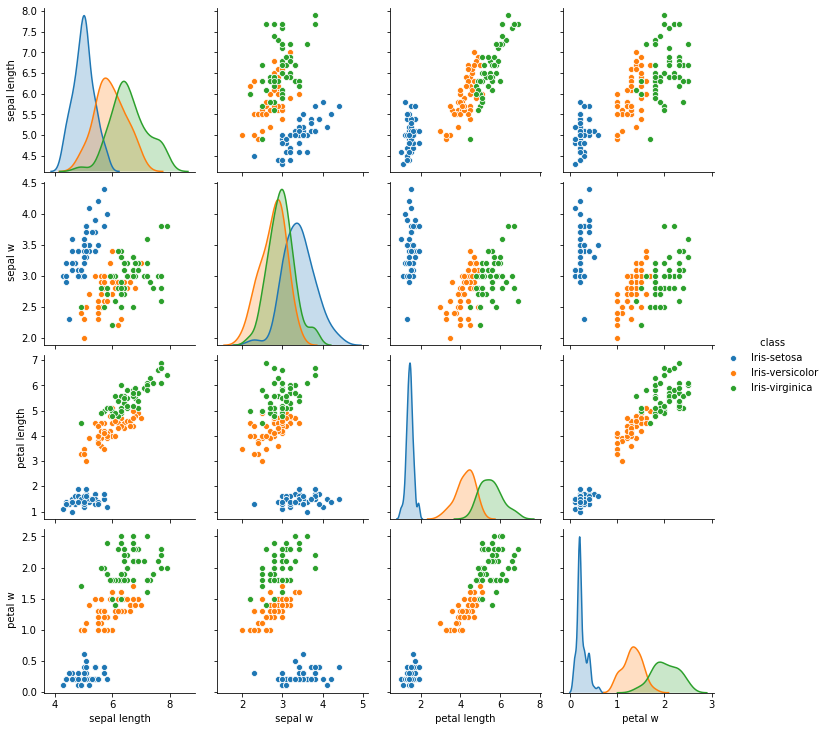

In [22]:
sns.pairplot(df, hue=' class')

Since there is only one dataset available (i.e. no training and test dataset) we need to divide the dataset into training and test dataset. To achieve this, we will use the `train_test_split` method from the scikit-learn  
First seprating the input and output values i.e. dependent and inddependent variables:

In [25]:
input_val = df[columns[0:len(columns)-1]].values
output_val = df[columns[-1]].values

In [26]:
# dividing the dataset:
(X_train, X_test, Y_train, Y_test) = train_test_split(input_val, output_val, train_size=0.7, random_state=1)

In [31]:
print("training set length-",len(X_train))#,len(Y_train))
print("testing set length-",len(X_test))

training set length- 105
testing set length- 45


Here i have splitted the data set in 70:30 ratio. The `random_state = 1` ensures that splitted dataset is the same even if we split the dataset again and again 

## Classification using Decision-Tree
For this purpose we will use sci-kit learn library which has already implemented functions for decision tree classifier.  
Setting criterion = `entropy` sets the ID-3 method which uses entropy

In [57]:
decison_iris = DecisionTreeClassifier(criterion = "entropy")
decison_iris.fit(X_train, Y_train)
# checking the accuracy of the fit :
print('accuracy on test set :',decison_iris.score(X_test, Y_test)) 

accuracy on test set : 0.9555555555555556


### Checking on some input of features:

In [71]:
X = np.array(list(map(float,input('values: ').split())))
X = X.reshape([1,X.shape[0]])
decison_iris.predict(X, check_input=True)

values: 5 2 1 0.2


array(['Iris-setosa'], dtype=object)

Hence, An accurate prdeiction was made on the given values  
Therefore we have achieved our task of making a decision tree  
Below is the **prediction_probability** for above values

In [53]:
decison_iris.predict_proba(X, check_input=True)

array([[0., 1., 0.]])

## Now looking at the Decision-Tree Obtained:

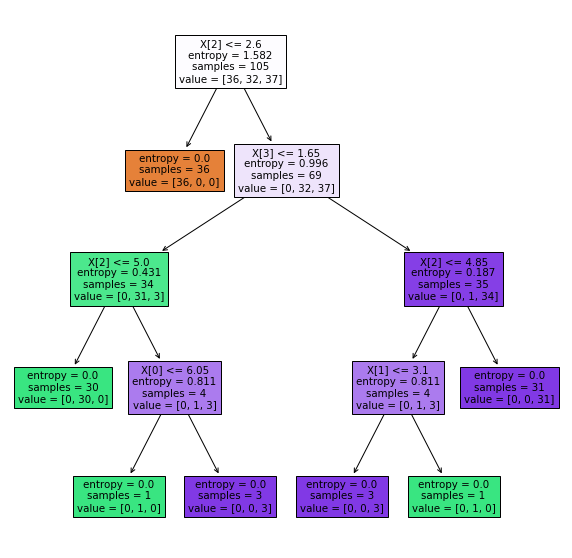

In [70]:
fig = plt.gcf()
fig.set_size_inches(10,10)
#plt.figure()
X = DecisionTreeClassifier(criterion = "entropy").fit(X_train, Y_train)
plot_tree(X, filled=True)
plt.show()

We can see that in the above tree the entropy value is used for classification of the data and entropy value here signifies Information gain for each branch thus we used **ID-3** algorithm to classify IRIS data set and had a good accuracy of 95.6% with an accurate prediction on random data values.
